<a href="https://colab.research.google.com/github/irvansikajudin/Data-Science/blob/main/Regularized_Regression_Predicting_Medv_Using_Ridge_%26_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library & Dataset

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load data from google

from google.colab import drive
drive.mount('/content/drive')
medv = pd.read_csv('/content/drive/MyDrive/data science/boston.csv')
medv.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Kumpulan Data Perumahan Boston

Dataset Perumahan Boston berasal dari informasi yang dikumpulkan oleh Layanan Sensus AS mengenai perumahan di wilayah Boston MA. Berikut ini penjelasan tentang kolom kumpulan data:

1.	CRIM - tingkat kejahatan per kapita menurut kota
2.	ZN - proporsi tanah perumahan yang dikategorikan untuk kavling lebih dari 25.000 sq.ft.
3.	INDUS - proporsi hektar bisnis non-ritel per kota.
4.	CHAS - Variabel dummy Sungai Charles (1 jika saluran membatasi sungai; 0 sebaliknya)
5.	NOX - konsentrasi oksida nitrat (bagian per 10 juta)
6.	RM - rata-rata jumlah kamar per hunian
7.	AGE - proporsi unit yang ditempati pemilik yang dibangun sebelum 1940
8.	DIS - jarak tertimbang ke lima pusat pekerjaan Boston
9.	RAD - indeks aksesibilitas ke jalan raya radial
10.	PAJAK - tarif pajak properti nilai penuh per 10.000 usd
11.	PTRATIO - rasio murid-guru menurut kota
12.	B - 1000(Bk - 0,63)^2 di mana Bk adalah proporsi orang kulit hitam menurut kota
13.	LSTAT - % status populasi yang lebih rendah
14.	MEDV - Nilai rata-rata rumah yang ditempati pemilik di $1000's

In [ ]:
# #showing the precise value counts
# #this code is especially useful if we have many numericals columns
# for col in numericals:
#   print(f"Value counts of {col} column")
#   print(medv[col].value_counts(), '\n')

In [ ]:
# # load data
# medv = pd.read_csv('boston.csv')
# medv.head()

# Data Cleaning

In [ ]:
#cek missing value lebih dalam dgn mendefinisikan value tertentu sebagai missing value
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', ' ']
# medv = pd.read_csv('boston.csv', na_values = missing_values)
medv = pd.read_csv('/content/drive/MyDrive/data science/boston.csv')
medv.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
medv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
medv.duplicated().sum()

0

In [ ]:
# store columns with specific data type
integer_columns = medv.select_dtypes(include=['int64']).columns
float_columns = medv.select_dtypes(include=['float64']).columns
object_columns = medv.select_dtypes(include=['object']).columns


# display columns
# print('\nint64 columns:\n', integer_columns)
# print('\nfloat64 columns:\n', float_columns)
# print('\nobject columns:\n', object_columns)

categoricals = list(object_columns)
numericals = list(integer_columns.append(float_columns))
print('numericals', numericals)
print('categoricals', categoricals)


numericals ['chas', 'rad', 'tax', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'black', 'lstat', 'medv']
categoricals []


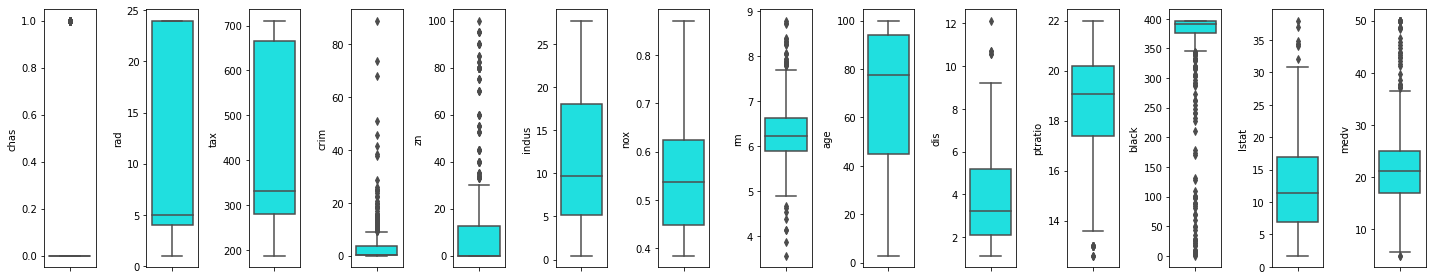

In [ ]:
plt.figure(figsize=(20,4))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=medv[features[i]], color='cyan')
    plt.tight_layout()

chas -> kategori

1.	crim -> numerik/kontinu -> 
2.	zn -> numerik/kontinu -> 
3.	rm -> numerik/kontinu -> 
4.	dis -> numerik/kontinu -> 
5.	ptratio -> numerik/kontinu -> 
6.	black -> numerik/kontinu -> 
7.	lstat -> numerik/kontinu -> 
8.	medv -> numerik/kontinu -> 

yang saya tau jika ada outlier pada data harus di olah dulu jika mengunakan liniear regression, tapi utk saat ini saya skip

# Predicting Medv Using Ridge & Lasso

# Regularized Regression

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = medv.drop(columns='medv')
target = medv[['medv']]

feature_medv_train, feature_medv_test, target_medv_train, target_medv_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_medv_train)

vif_medv = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_medv.columns = ['feature','vif_score']
vif_medv = vif_medv.loc[vif_medv.feature!='const']
vif_medv

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


There are several features with high VIF scores:
1. `indus`
2. `nox`
3. `dis`
4. `rad`
5. `tax`

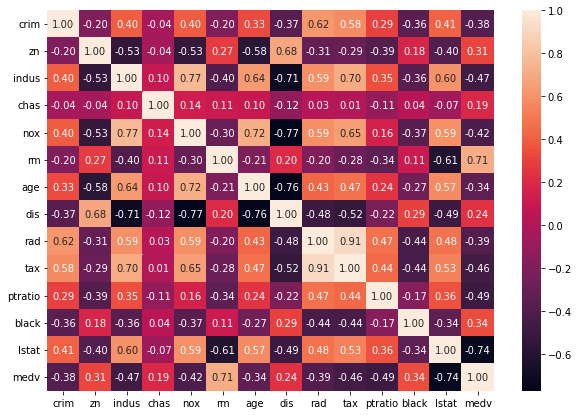

In [ ]:
# heatmap correlation
medv_train = pd.concat([feature_medv_train, target_medv_train], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

We choose to retain `lstat` Therefore, we need to drop:
* `indus`
* `nox`
* `dis`
* `rad`
* `tax`


In [ ]:
# drop redundant features
feature_medv_train = feature_medv_train.drop(columns=['indus','nox','dis','rad','tax'])
feature_medv_test = feature_medv_test.drop(columns=['indus','nox','dis','rad','tax'])

## Recheck VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_medv_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.346204
2,zn,1.693933
3,chas,1.049159
4,rm,1.792172
5,age,2.103471
6,ptratio,1.348867
7,black,1.229249
8,lstat,2.677478


good !

## Model Training

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
ridge_reg = Ridge(alpha=0.1, 
                  random_state=42)

ridge_reg.fit(X_medv_train, y_medv_train)

Ridge(alpha=0.1, random_state=42)

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_medv_train
model = ridge_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,7.026244
1,crim,-0.058446
2,zn,-0.015109
3,chas,3.081736
4,rm,5.074085
5,age,0.011234
6,ptratio,-0.807909
7,black,0.012265
8,lstat,-0.517992


### Lasso

In [ ]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(alpha=0.1, 
                  random_state=42)

lasso_reg.fit(X_medv_train, y_medv_train)

Lasso(alpha=0.1, random_state=42)

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_medv_train
model = lasso_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,9.082515
1,crim,-0.058221
2,zn,-0.013805
3,chas,1.581274
4,rm,4.793383
5,age,0.015460
6,ptratio,-0.815924
7,black,0.012241
8,lstat,-0.544157


# Workflow with choosing the best lambda

## Split data: train-validation-test

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = medv.drop(columns='medv')
target = medv[['medv']]

feature_medv_pretrain, feature_medv_test, target_medv_pretrain, target_medv_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_medv_train, feature_medv_validation, target_medv_train, target_medv_validation = train_test_split(feature_medv_pretrain, target_medv_pretrain, test_size=0.20, random_state=42)

## Drop Multicollinear Features

In [ ]:
feature_medv_train = feature_medv_train.drop(columns=['indus','nox','dis','rad','tax'])
feature_medv_validation = feature_medv_validation.drop(columns=['indus','nox','dis','rad','tax'])
feature_medv_test = feature_medv_test.drop(columns=['indus','nox','dis','rad','tax'])

## Train Multiple Models (Ridge)
with different alpha (lambda)

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_medv_train, y_medv_train)
ridge_reg_pointone.fit(X_medv_train, y_medv_train)
ridge_reg_one.fit(X_medv_train, y_medv_train)
ridge_reg_ten.fit(X_medv_train, y_medv_train)

Ridge(alpha=10, random_state=42)

## Find the best model (alpha) - (Ridge)
Based on validation set

In [ ]:
from sklearn.metrics import mean_squared_error

X_medv_validation = feature_medv_validation.to_numpy()
y_medv_validation = target_medv_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 5.092231170467901
RMSE of Ridge regression model with alpha = 0.1 is 5.091634452134003
RMSE of Ridge regression model with alpha = 1.0 is 5.08588916752786
RMSE of Ridge regression model with alpha = 10 is 5.043868213771908


The best Lamda is 10

## Coefficient Tour - (Ridge)

In [ ]:
# model = ridge_reg_pointzeroone

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_medv_train.columns.tolist(),
#     'coefficient':[model.intercept_] + list(model.coef_)
# })

# coef_df

In [ ]:
# model = ridge_reg_pointone

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_medv_train.columns.tolist(),
#     'coefficient':[model.intercept_] + list(model.coef_)
# })

# coef_df

In [ ]:
# model = ridge_reg_one

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_medv_train.columns.tolist(),
#     'coefficient':[model.intercept_] + list(model.coef_)
# })

# coef_df

In [ ]:
model = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,7.395814
1,crim,-0.051725
2,zn,-0.009680
3,chas,2.120173
4,rm,5.003147
5,age,0.022736
6,ptratio,-0.844867
7,black,0.012735
8,lstat,-0.535677


the best lamda is 10

In [ ]:
col_one_list_feature = coef_df['feature'].tolist()
col_one_list_coefficient = round(coef_df['coefficient'], 3).tolist()
# print(col_one_list_feature)
# print(col_one_list_coefficient)

import itertools 
# iterates over 2 lists and till all are exhausted
print('medv = ')
for (a, b) in itertools.zip_longest(col_one_list_feature, col_one_list_coefficient):
    print (b, a, "+")


medv = 
7.396 intercept +
-0.052 crim +
-0.01 zn +
2.12 chas +
5.003 rm +
0.023 age +
-0.845 ptratio +
0.013 black +
-0.536 lstat +


Interpretarion : 

setiap kenaikan  age meningkatkan medv sebesar 0.023 

## Model Evaluation - (Ridge)

In [ ]:
# ridge_best = ridge_reg_pointzeroone

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_medv_train.columns.tolist(),
#     'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
# })

# coef_df

In [ ]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,7.395814
1,crim,-0.051725
2,zn,-0.009680
3,chas,2.120173
4,rm,5.003147
5,age,0.022736
6,ptratio,-0.844867
7,black,0.012735
8,lstat,-0.535677


### Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_medv_train)))

R-squared for training data is 0.614730938359663


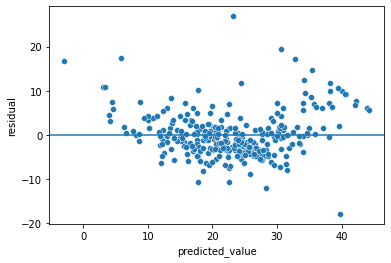

In [ ]:
# calculate residuals
residual = y_medv_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_medv_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_medv_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_medv_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_medv_train)))

RMSE for training data is 4.973460314892209
MAE for training data is 3.531218740206662
MAPE for training data is 0.20991573067135746


### Testing Error

In [ ]:
# prepare prediction result on test data
X_medv_test = feature_medv_test.to_numpy()
y_predict_test = ridge_best.predict(X_medv_test)

# ground truth target
y_medv_test = target_medv_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_medv_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_medv_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_medv_test)))

RMSE for testing data is 5.434284304421254
MAE for testing data is 3.36531338046399
MAPE for testing data is 0.25501304825638016


interpretation :

model Ridge Regression nya cendrung acceptable, karena RMSE dari training data mirip-mirip dengan test data, Mape di training dan test data tidak lebih dari 30 % maka tidak underfit

# Predicting Medv Using Lasso

In [ ]:
# # load data
# medv = pd.read_csv('boston.csv')
# medv.head()

In [ ]:
# # split train test
# from sklearn.model_selection import train_test_split

# feature = medv.drop(columns='medv')
# target = medv[['medv']]

# feature_medv_pretrain, feature_medv_test, target_medv_pretrain, target_medv_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# feature_medv_train, feature_medv_validation, target_medv_train, target_medv_validation = train_test_split(feature_medv_pretrain, target_medv_pretrain, test_size=0.20, random_state=42)

## Train Multiple Models - (Lasso)
with different alpha (lambda)

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_medv_train, y_medv_train)
lasso_reg_pointone.fit(X_medv_train, y_medv_train)
lasso_reg_one.fit(X_medv_train, y_medv_train)
lasso_reg_ten.fit(X_medv_train, y_medv_train)

Lasso(alpha=10, random_state=42)

## Find the best model (alpha) - (Lasso)
Based on validation set

In [ ]:
from sklearn.metrics import mean_squared_error

X_medv_validation = feature_medv_validation.to_numpy()
y_medv_validation = target_medv_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation,y_predict_validation))
    print(f'RMSE of lasso regression model with alpha = {alpha} is {rmse}')

RMSE of lasso regression model with alpha = 0.01 is 5.088799831686319
RMSE of lasso regression model with alpha = 0.1 is 5.070802608617236
RMSE of lasso regression model with alpha = 1.0 is 4.986888677205865
RMSE of lasso regression model with alpha = 10 is 5.436627646354434


The best Lamda is 1.0

## Coefficient Tour - (Lasso)

In [ ]:
# model = lasso_reg_pointzeroone

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_medv_train.columns.tolist(),
#     'coefficient':[model.intercept_] + list(model.coef_)
# })

# coef_df

In [ ]:
# model = lasso_reg_pointone

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_medv_train.columns.tolist(),
#     'coefficient':[model.intercept_] + list(model.coef_)
# })

# coef_df

In [ ]:
model = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.920335
1,crim,-0.041308
2,zn,0.001378
3,chas,0.000000
4,rm,2.569465
5,age,0.040357
6,ptratio,-0.775060
7,black,0.011706
8,lstat,-0.718181


In [ ]:
col_one_list_feature = coef_df['feature'].tolist()
col_one_list_coefficient = round(coef_df['coefficient'], 3).tolist()
# print(col_one_list_feature)
# print(col_one_list_coefficient)

import itertools 
# iterates over 2 lists and till all are exhausted
print('medv = ')
for (a, b) in itertools.zip_longest(col_one_list_feature, col_one_list_coefficient):
    print (b, a, "+")

medv = 
22.92 intercept +
-0.041 crim +
0.001 zn +
0.0 chas +
2.569 rm +
0.04 age +
-0.775 ptratio +
0.012 black +
-0.718 lstat +


Interpretarion : 

setiap kenaikan  age meningkatkan medv sebesar 0.04

In [ ]:
# model = lasso_reg_ten

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_medv_train.columns.tolist(),
#     'coefficient':[model.intercept_] + list(model.coef_)
# })

# coef_df

## Model Evaluation - (Lasso)

In [ ]:
# lasso_best = lasso_reg_pointzeroone

# coef_df = pd.DataFrame({
#     'feature':['intercept'] + feature_medv_train.columns.tolist(),
#     'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
# })

# coef_df

In [ ]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.920335
1,crim,-0.041308
2,zn,0.001378
3,chas,0.000000
4,rm,2.569465
5,age,0.040357
6,ptratio,-0.775060
7,black,0.011706
8,lstat,-0.718181


### Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_medv_train)))

R-squared for training data is 0.48498413164300713


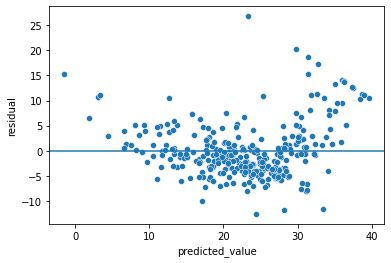

In [ ]:
# calculate residuals
residual = y_medv_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_medv_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_medv_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_medv_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_medv_train)))

RMSE for training data is 5.296197412173467
MAE for training data is 3.8150797904233658
MAPE for training data is 0.22756838149200664


### Testing Error

In [ ]:
# prepare prediction result on test data
X_medv_test = feature_medv_test.to_numpy()
y_predict_test = lasso_best.predict(X_medv_test)

# ground truth target
y_medv_test = target_medv_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_medv_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_medv_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_medv_test)))

RMSE for testing data is 5.328833514735018
MAE for testing data is 3.5574928409489917
MAPE for testing data is 0.2886322508326979


interpretation :

model Lasso nya cendrung acceptable, karena RMSE dari training data mirip-mirip dengan test data, 
Mape di training dan test data tidak lebih dari 30 % maka tidak underfit